# Netflix - Data Exploration and Visualisation

## Problem Statement

The goal is to analyse the dataset and find different trends between movies, TV shows, genres and actors. The insights can be
used to recommend Netflix on which type of movies or shows to produce and where to expand the business.

### Basic exploration of dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

* There are 8807 rows and 12 features in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* All columns are of Object type except release_year.

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


* The release year of the movies and shows ranges from 1925 to 2021 where 50% of the content is released after 2017.

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


* Almost all columns have no null or very less null data while director, cast, country have more null data.

In [ ]:
df.duplicated().sum()

np.int64(0)

* There are no duplicate rows in the data.

### Finding unique value counts

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


* It can be seen that there are much more number of movies than TV Shows.

In [ ]:
print(df['duration'].value_counts())
print(df['duration'].nunique())

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
228 min         1
18 min          1
205 min         1
201 min         1
191 min         1
Name: count, Length: 220, dtype: int64
220


In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


### Data cleaning and preparation

In [ ]:
#Removing any spaces before or after the text.
df['date_added']=df['date_added'].str.strip().fillna('')

In [ ]:
#Converting to datetime format
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'].isna().sum()

np.int64(10)

In [ ]:
#Creating a new column year
df['year_added']=df['date_added'].dt.year

In [ ]:
#Creating a new column month
df['month_added']=df['date_added'].dt.month

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 963.4+ KB


### Ratings and Duration analysis

Comparing number of movies and TV shows

In [ ]:
genre_perc = df['type'].value_counts(normalize=True).mul(100).reset_index()

In [ ]:
genre_perc

,type,proportion
0,Movie,69.615079
1,TV Show,30.384921


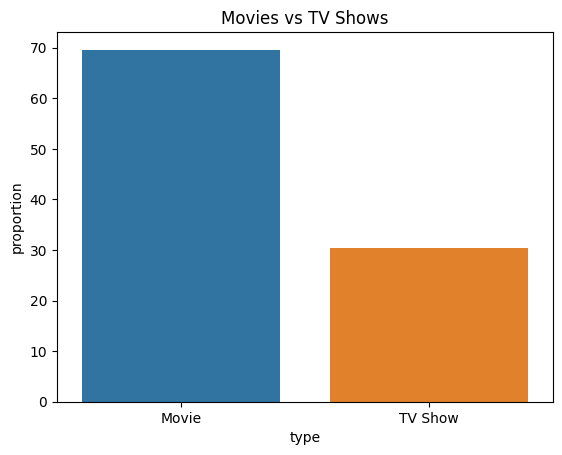

In [ ]:
sns.barplot(x='type', y='proportion', data=genre_perc, hue='type')
plt.title('Movies vs TV Shows')
plt.show()

* This tells that most of the content is Movie.

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [ ]:
movie_rating=df[df['type']=='Movie']['rating'].value_counts().reset_index(name='count')
movie_rating

,rating,count
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


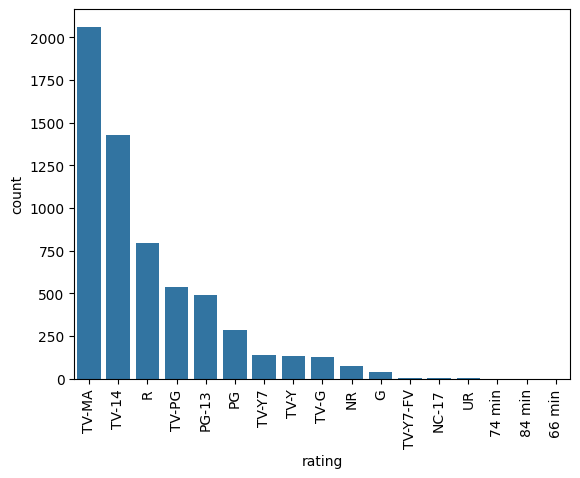

In [ ]:
sns.barplot(x='rating', y='count', data=movie_rating)
plt.xticks(rotation=90)
plt.show()

* Most common Movie ratings are TV-MA, TV-14 and R.

In [ ]:
tv_rating=df[df['type']=='TV Show']['rating'].value_counts().reset_index(name='count')
tv_rating

,rating,count
0,TV-MA,1145
1,TV-14,733
2,TV-PG,323
3,TV-Y7,195
4,TV-Y,176
5,TV-G,94
6,NR,5
7,R,2
8,TV-Y7-FV,1


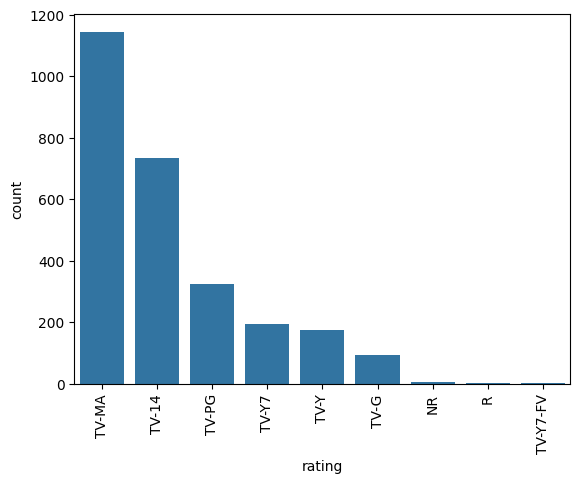

In [ ]:
sns.barplot(x='rating', y='count', data=tv_rating)
plt.xticks(rotation=90)
plt.show()

* Most common TV ratings are TV-MA and TV-14 and TV-PG.

Analysing movie and TV ratings together.

In [ ]:
ratings=pd.merge(movie_rating, tv_rating, on='rating', how='outer', suffixes=('_movie', '_tv'))
ratings

,rating,count_movie,count_tv
0,66 min,1,NaN
1,74 min,1,NaN
2,84 min,1,NaN
3,G,41,NaN
4,NC-17,3,NaN
5,NR,75,5.0
6,PG,287,NaN
7,PG-13,490,NaN
8,R,797,2.0
9,TV-14,1427,733.0


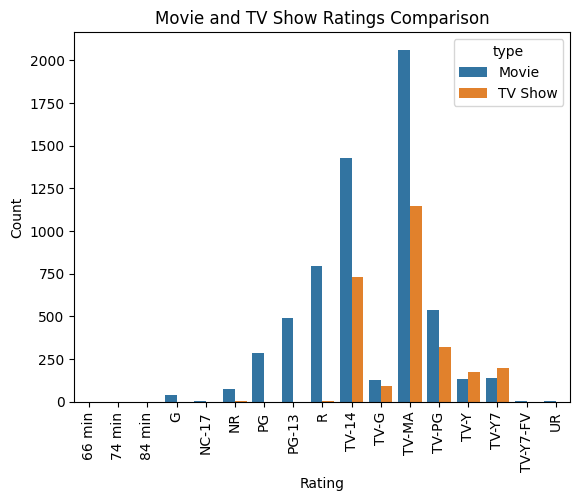

In [ ]:
ratings_melted = ratings.melt(id_vars='rating', value_vars=['count_movie', 'count_tv'], var_name='type', value_name='count')
ratings_melted['type'] = ratings_melted['type'].replace({'count_movie': 'Movie', 'count_tv': 'TV Show'})

sns.barplot(x='rating', y='count', hue='type', data=ratings_melted)
plt.xticks(rotation=90)
plt.title('Movie and TV Show Ratings Comparison')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Analysing duration

In [ ]:
df[df['type']=='Movie']['duration'].value_counts()

,count
duration,
90 min,152
97 min,146
94 min,146
93 min,146
91 min,144
...,...
228 min,1
18 min,1
205 min,1


In [ ]:
df[df['type']=='TV Show']['duration'].value_counts()

,count
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


In [ ]:
df['duration'].isna().sum()

np.int64(3)

* Here we can see that movies have duration in minutes and TV Shows have duration in seasons. We can convert them to numerical format for better analysis and fill the null data with zeros since there are not many rows having null values.

In [ ]:
df['duration_cleaned'] = df['duration'].fillna('0').str.split(' ').apply(lambda x: x[0]).astype('int')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,88


In [ ]:
df[df['duration_cleaned']==0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0,0
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0,0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0,0


In [ ]:
df[df['type']=='Movie']['duration_cleaned'].mean()

np.float64(99.52846191485891)

In [ ]:
df[df['type']=='TV Show']['duration_cleaned'].mean()

np.float64(1.764947683109118)

In [ ]:
df[df['type']=='TV Show']['duration_cleaned'].median()

1.0

* Here movies have a mean of around 100 minutes and TV Shows have mean around 1.7 seasons and median as 1 season.

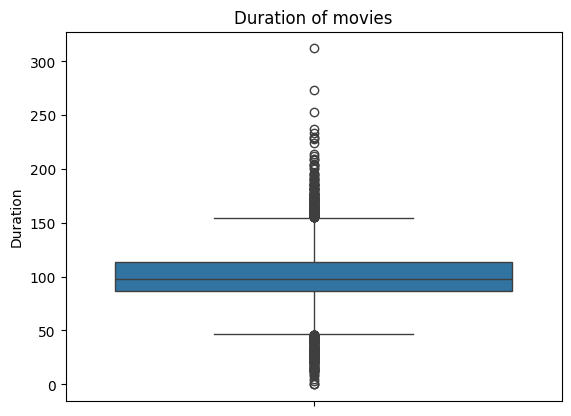

In [ ]:
sns.boxplot(y='duration_cleaned', data=df[df['type']=='Movie'])
plt.ylabel('Duration')
plt.title('Duration of movies')
plt.show()

* The plot indicates movies have duration mostly ranging from 50 to 150 minutes with outliers extending to 300 minutes.

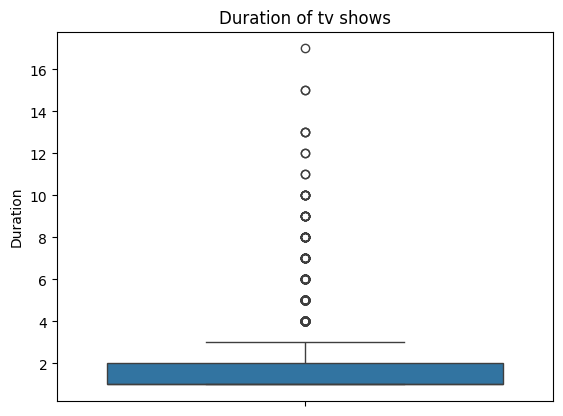

In [ ]:
sns.boxplot(y='duration_cleaned', data=df[df['type']=='TV Show'])
plt.ylabel('Duration')
plt.title('Duration of tv shows')
plt.show()

* The plot indicates number of seasons in TV shows mostly between 1 and 3 with outliers extending upto 16 seasons.

### Month and year trends

In [ ]:
df['year_added'].value_counts()

,count
year_added,
2019.0,2016
2020.0,1879
2018.0,1649
2021.0,1498
2017.0,1188
2016.0,429
2015.0,82
2014.0,24
2011.0,13


In [ ]:
df_movie=df[df['type']=='Movie']['year_added'].value_counts().sort_index()

In [ ]:
df_movie

,count
year_added,
2008.0,1
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,6
2014.0,19
2015.0,56
2016.0,253


In [ ]:
df_tv=df[df['type']=='TV Show']['year_added'].value_counts().sort_index()

In [ ]:
df_tv

,count
year_added,
2008.0,1
2013.0,5
2014.0,5
2015.0,26
2016.0,176
2017.0,349
2018.0,412
2019.0,592
2020.0,595


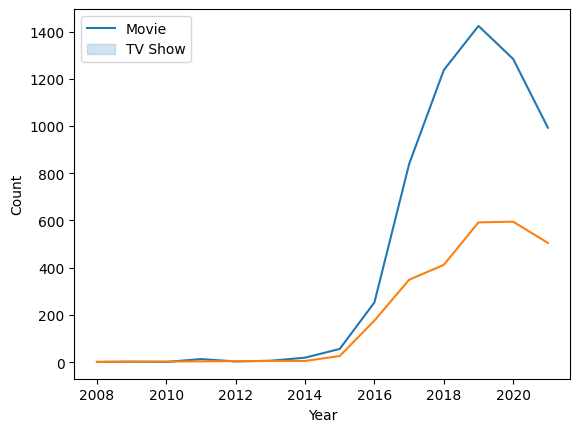

In [ ]:
sns.lineplot(x=df_movie.index, y=df_movie.values)
sns.lineplot(x=df_tv.index, y=df_tv.values)
plt.legend(['Movie', 'TV Show'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

* Here we can see number of Movies and TV shows added are increasing every year with Movies being added slightly more.

* There is a slight decrease in numbers in post 2019 period which could be due to COVID or dataset incompleteness.

In [ ]:
df['release_year'].value_counts()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1961,1
1925,1
1959,1


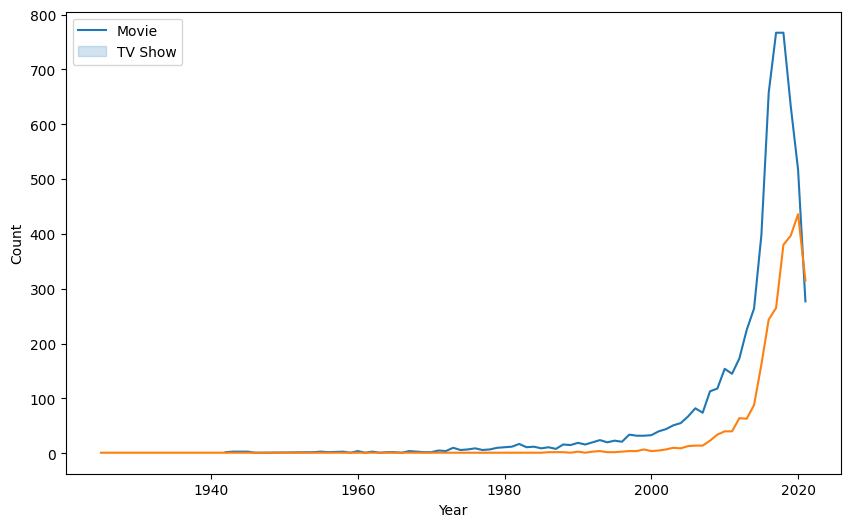

In [ ]:
df_movie_released=df[df['type']=='Movie']['release_year'].value_counts().sort_index()
df_tv_released=df[df['type']=='TV Show']['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_movie_released.index, y=df_movie_released.values)
sns.lineplot(x=df_tv_released.index, y=df_tv_released.values)
plt.legend(['Movie', 'TV Show'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

* Comparing release years also for both Movies and TV Shows, both show and upward trend with movies being released more. Here also we can see the dip in near 2019 period.

In [ ]:
month_movie_count=df[df['type']=='Movie']['month_added'].value_counts().reset_index().sort_values(by='count', ascending=False)
month_movie_count

,month_added,count
0,7.0,565
1,4.0,550
2,12.0,547
3,1.0,546
4,10.0,545
5,3.0,529
6,9.0,519
7,8.0,519
8,11.0,498
9,6.0,492


<Axes: xlabel='month_added', ylabel='count'>

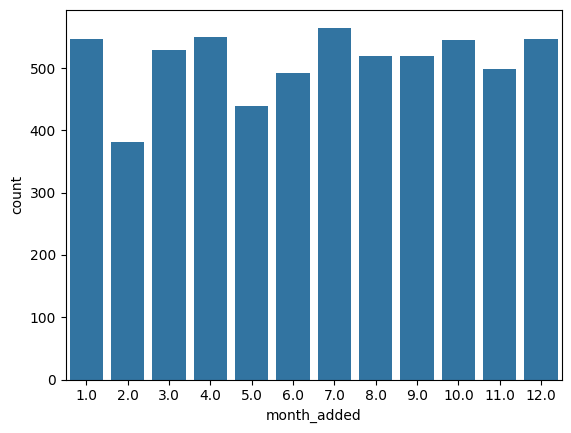

In [ ]:
sns.barplot(x='month_added', y='count', data=month_movie_count)

In [ ]:
month_tv_count=df[df['type']=='TV Show']['month_added'].value_counts().reset_index().sort_values(by='count', ascending=False)
month_tv_count

,month_added,count
0,12.0,266
1,7.0,262
2,9.0,251
3,8.0,236
4,6.0,236
5,10.0,215
6,4.0,214
7,3.0,213
8,11.0,207
9,5.0,193


<Axes: xlabel='month_added', ylabel='count'>

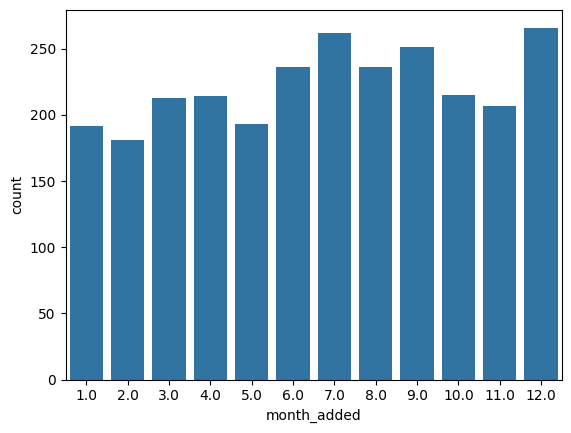

In [ ]:
sns.barplot(x='month_added', y='count', data=month_tv_count)

In [ ]:
month_counts = pd.concat([month_movie_count.assign(type='Movie'), month_tv_count.assign(type='TV Show')])
month_counts

,month_added,count,type
0,7.0,565,Movie
1,4.0,550,Movie
2,12.0,547,Movie
3,1.0,546,Movie
4,10.0,545,Movie
5,3.0,529,Movie
6,9.0,519,Movie
7,8.0,519,Movie
8,11.0,498,Movie
9,6.0,492,Movie


In [ ]:
month_total_count=df['month_added'].value_counts().reset_index(name='count')

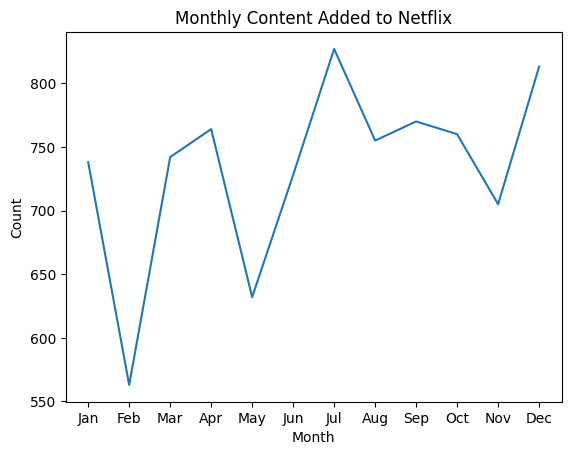

In [ ]:
sns.lineplot(x='month_added', y='count', data=month_total_count)
plt.title('Monthly Content Added to Netflix')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

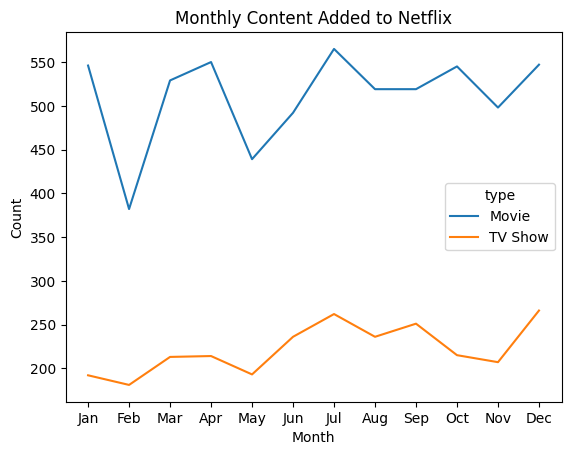

In [ ]:
sns.lineplot(x='month_added', y='count', hue='type', data=month_counts)
plt.title('Monthly Content Added to Netflix')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

* Here we can see there is a large number of content added in months of July and December which indicates more content is being added in months of festivals and holidays.

### Genre Analysis

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2


Converting listed_in column to a list of genres for rows having movies.

In [ ]:
genres_list_movies=df.loc[df['type']=='Movie', 'listed_in'].apply(lambda x: x.split(',')).explode()

In [ ]:
genres_list_movies = genres_list_movies.str.strip()

In [ ]:
genres_list_movies_counts=genres_list_movies.value_counts()
genres_list_movies_counts

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577


Converting listed_in column to a list of genres for rows having TV Shows.

In [ ]:
genres_list_tv=df.loc[df['type']=='TV Show', 'listed_in'].apply(lambda x: x.split(',')).explode()

In [ ]:
genres_list_tv = genres_list_tv.str.strip()

In [ ]:
genres_list_tv_counts=genres_list_tv.value_counts()
genres_list_tv_counts

,count
listed_in,
International TV Shows,1351
TV Dramas,763
TV Comedies,581
Crime TV Shows,470
Kids' TV,451
Docuseries,395
Romantic TV Shows,370
Reality TV,255
British TV Shows,253


Merging both genre_list counts and genre_movie_counts to get both counts for every genre.

In [ ]:
genres_merged=pd.merge(genres_list_movies_counts.to_frame(), genres_list_tv_counts.to_frame(), on='listed_in', how='outer', suffixes=('_movies', '_tv'))

In [ ]:
genres_merged.sort_values(by='count_movies', ascending=False)

,count_movies,count_tv
listed_in,,
International Movies,2752.0,NaN
Dramas,2427.0,NaN
Comedies,1674.0,NaN
Documentaries,869.0,NaN
Action & Adventure,859.0,NaN
Independent Movies,756.0,NaN
Children & Family Movies,641.0,NaN
Romantic Movies,616.0,NaN
Thrillers,577.0,NaN


In [ ]:
genres_merged.sort_values(by='count_tv', ascending=False)

,count_movies,count_tv
listed_in,,
International TV Shows,NaN,1351.0
TV Dramas,NaN,763.0
TV Comedies,NaN,581.0
Crime TV Shows,NaN,470.0
Kids' TV,NaN,451.0
Docuseries,NaN,395.0
Romantic TV Shows,NaN,370.0
Reality TV,NaN,255.0
British TV Shows,NaN,253.0


Visualising top Movies and TV Shows genres.

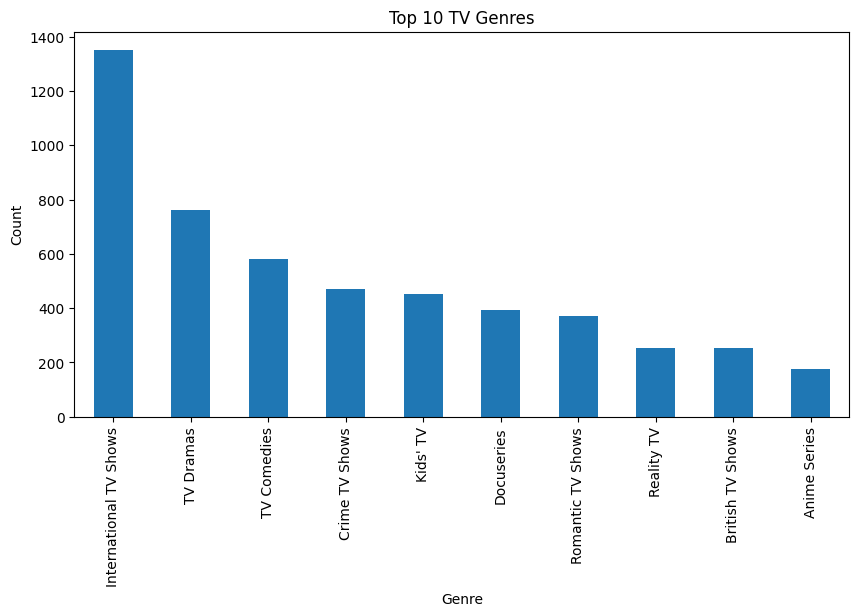

In [ ]:
top_tv = genres_merged.sort_values(by='count_tv', ascending=False)
top_tv['count_tv'].head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 TV Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

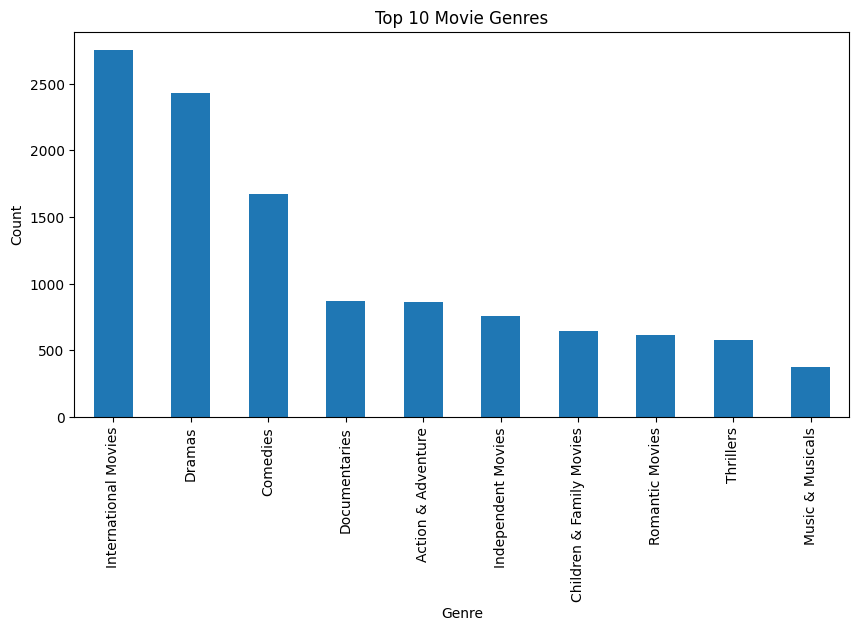

In [ ]:
top_movies = genres_merged.sort_values(by='count_movies', ascending=False)
top_movies['count_movies'].head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()



*   International TV Shows, Dramas and TV comedies are top genres in TV Shows.
*   International Movies, Dramas and comedies are top genres in movies.



### Country wise analysis

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2


In [ ]:
df['country'].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


In [ ]:
# Removing leading and trailing spaces.
df['country']=df['country'].str.strip(' ')
df['country']

,country
0,United States
1,South Africa
2,NaN
3,NaN
4,India
...,...
8802,United States
8803,NaN
8804,United States
8805,United States


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  year_added        8797 non-null   float64       
 13  month_added       8797 non-null   float64       
 14  duration_cleaned  8807 n

Converting country column to alist of countries

In [ ]:
country_split=df['country'].str.split(',')
country_split

,country
0,[United States]
1,[South Africa]
2,NaN
3,NaN
4,[India]
...,...
8802,[United States]
8803,NaN
8804,[United States]
8805,[United States]


In [ ]:
country_split.value_counts()

,count
country,
[United States],2818
[India],972
[United Kingdom],419
[Japan],245
[South Korea],199
...,...
"[Mexico, United States, Spain, Colombia]",1
"[Canada, Norway]",1
"[Finland, Germany, Belgium]",1


In [ ]:
df['country'] = country_split

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,88


Getting count of content in different countries

In [ ]:
df_country= df.explode('country')
grouped_country = df_country.groupby('country').size().sort_values(ascending=False)
grouped_country

,0
country,
United States,3211
India,1008
United Kingdom,628
United States,479
Canada,271
...,...
Slovenia,1
Puerto Rico,1
Syria,1


Removing leading and trailing spaces from df_country country column.

In [ ]:
df_country['country']=df_country['country'].str.strip()

Getting counts of Movies and TV Shows in different countries.

In [ ]:
grouped_country_type = df_country.groupby(['country', 'type']).size().sort_values(ascending=False).reset_index()
grouped_country_type.columns = ['country', 'type', 'count']
grouped_country_type

,country,type,count
0,United States,Movie,2752
1,India,Movie,962
2,United States,TV Show,938
3,United Kingdom,Movie,534
4,Canada,Movie,319
...,...,...,...
179,Switzerland,TV Show,1
180,Ukraine,Movie,1
181,United Arab Emirates,TV Show,1
182,Vatican City,Movie,1


In [ ]:
pivoted = grouped_country_type.pivot(index='country', columns='type', values='count')
pivoted

type,Movie,TV Show
country,,
,6.0,1.0
Afghanistan,1.0,NaN
Albania,1.0,NaN
Algeria,3.0,NaN
Angola,1.0,NaN
...,...,...
Vatican City,1.0,NaN
Venezuela,4.0,NaN
Vietnam,7.0,NaN


Visualising top countries by Movies along with the TV show counts for them.

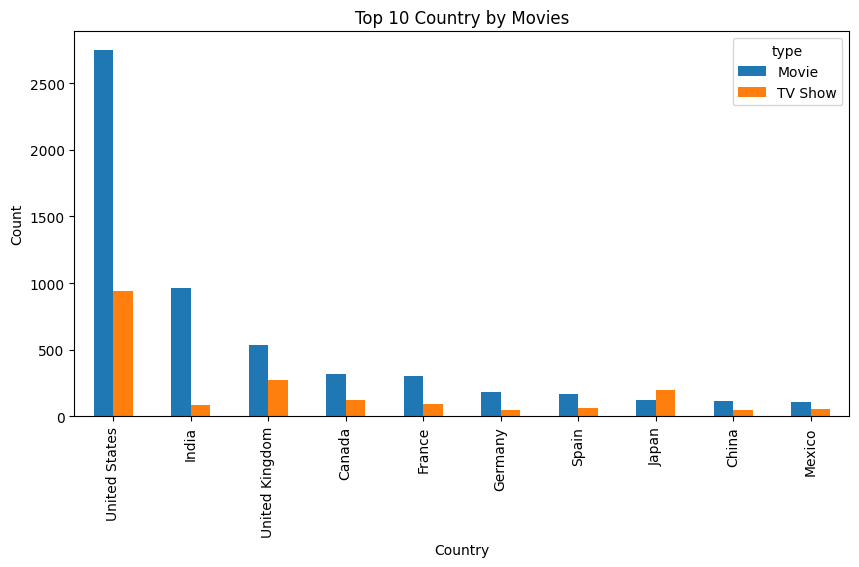

In [ ]:
top_movies = pivoted.sort_values(by='Movie', ascending=False)
top_movies.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Country by Movies')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

* Here we can see that countries US and India produce largest
number of movies while US having TV shows also in high number.

* However number of TV shows in India is comparatively lower.

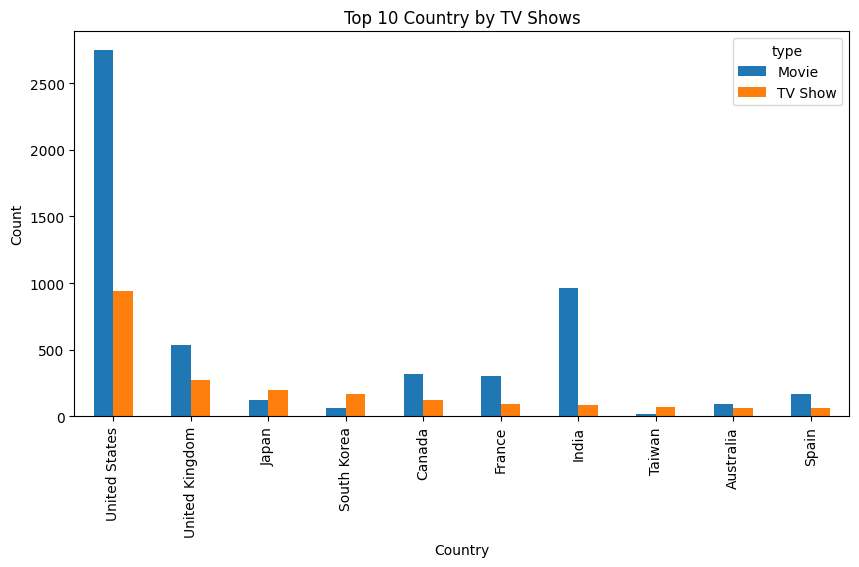

In [ ]:
top_tv = pivoted.sort_values(by='TV Show', ascending=False)
top_tv.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Country by TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

* Here we can see that countries US and UK produce largest
number of TV Shows while US having movies also in high number.

* Japan has third largest TV show count but movies are comparatively lower.

Analysing grwoth in number of TV shows and Movies in these countries over the years.

In [ ]:
df_country_year=df.explode('country').groupby(['country', 'year_added', 'type'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
df_country_year

,country,year_added,type,count
982,United States,2019.0,Movie,607
984,United States,2020.0,Movie,488
986,United States,2021.0,Movie,378
980,United States,2018.0,Movie,374
658,India,2018.0,Movie,322
...,...,...,...,...
49,Brazil,2018.0,TV Show,1
51,Brazil,2019.0,TV Show,1
52,Brazil,2020.0,Movie,1
54,Brazil,2021.0,TV Show,1


In [ ]:
df_country_year_movie=df_country_year[(df_country_year['type']=='Movie') & (df_country_year['country'].isin(['United States', 'India', 'United Kingdom', 'Canada', 'France']))]
df_country_year_movie

,country,year_added,type,count
982,United States,2019.0,Movie,607
984,United States,2020.0,Movie,488
986,United States,2021.0,Movie,378
980,United States,2018.0,Movie,374
658,India,2018.0,Movie,322
978,United States,2017.0,Movie,317
660,India,2019.0,Movie,194
662,India,2020.0,Movie,176
656,India,2017.0,Movie,139
976,United States,2016.0,Movie,122


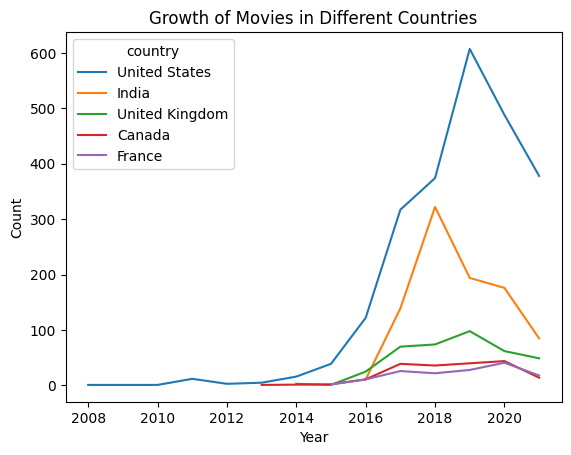

In [ ]:
sns.lineplot(x='year_added', y='count', hue='country', data=df_country_year_movie)
plt.title('Growth of Movies in Different Countries')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

* US movies started to get added much earlier while other companies came much later.

* Canada was second to come.

In [ ]:
df_country_year_tv=df_country_year[(df_country_year['type']=='TV Show') & (df_country_year['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']))]
df_country_year_tv

,country,year_added,type,count
985,United States,2020.0,TV Show,222
987,United States,2021.0,TV Show,162
983,United States,2019.0,TV Show,161
981,United States,2018.0,TV Show,128
979,United States,2017.0,TV Show,87
959,United Kingdom,2019.0,TV Show,57
977,United States,2016.0,TV Show,57
955,United Kingdom,2017.0,TV Show,50
961,United Kingdom,2020.0,TV Show,45
872,South Korea,2019.0,TV Show,45


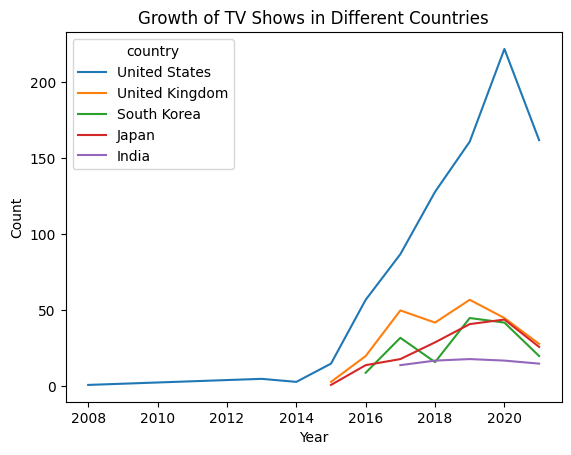

In [ ]:
sns.lineplot(x='year_added', y='count', hue='country', data=df_country_year_tv)
plt.title('Growth of TV Shows in Different Countries')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

* US TV shows started to get added much earlier while other companies came much later.

* TV shows from India started to get added much later.

### Directors and Actors analysis

Creating lists of directors, actors and genres

In [ ]:
df['director']=df['director'].str.split(',')

In [ ]:
df['cast']=df['cast'].str.split(',')

In [ ]:
df['listed_in']=df['listed_in'].str.split(',')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,2021.0,9.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,2021.0,9.0,2


Creating separate dataframes for cast, genre and director.

In [ ]:
cast_exploded=df.explode('cast')
cast_exploded.groupby('type')['cast'].count()

,cast
type,
Movie,44475
TV Show,19651


In [ ]:
cast_exploded['cast'].value_counts().sort_values(ascending=False)

,count
cast,
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
...,...
Gabriela Maria Schmeide,1
Melanie Straub,1
Maryam Zaree,1


In [ ]:
dir_exploded=df.explode('director')
dir_exploded.groupby('type')['director'].count()

,director
type,
Movie,6666
TV Show,312


In [ ]:
dir_exploded['director'].value_counts().sort_values(ascending=False)

,count
director,
Rajiv Chilaka,22
Jan Suter,18
Raúl Campos,18
Suhas Kadav,16
Marcus Raboy,16
...,...
Marston Sawyers,1
Alison MacLean,1
Steve Barker,1


In [ ]:
genre_exploded=df.explode('listed_in')
genre_exploded.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0,9.0,1


In [ ]:
cast_genre_exploded=cast_exploded.explode('listed_in')
cast_genre_exploded.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_cleaned
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,2


In [ ]:
cast_genre_exploded.groupby(['listed_in', 'cast'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,listed_in,cast,count
19435,International Movies,Anupam Kher,33
80806,Children & Family Movies,Rupa Bhimani,25
79758,Children & Family Movies,Julie Tejwani,24
76550,Anime Series,Takahiro Sakurai,23
31755,International Movies,Shah Rukh Khan,22
...,...,...,...
44224,Romantic Movies,Bront Palarae,1
44223,Romantic Movies,Brenda Wairimu,1
44222,Romantic Movies,Brely Evans,1
44221,Romantic Movies,Brave Williams,1


Grouping by genre and cast.

In [ ]:
top_actor_by_genre = cast_genre_exploded.groupby(['listed_in', 'cast'])['show_id'].count().reset_index(name='count')
top_actor_by_genre = top_actor_by_genre.loc[top_actor_by_genre.groupby('listed_in')['count'].idxmax()]
top_actor_by_genre.sort_values(by='count', ascending=False)

,listed_in,cast,count
19435,International Movies,Anupam Kher,33
80806,Children & Family Movies,Rupa Bhimani,25
76550,Anime Series,Takahiro Sakurai,23
35080,International TV Shows,Takahiro Sakurai,21
83224,Comedies,Anupam Kher,14
...,...,...,...
117134,Romantic Movies,Allen Maldonado,1
117564,Sports Movies,Ian Wright,1
117536,Spanish-Language TV Shows,Adriano Zendejas,1
120489,TV Sci-Fi & Fantasy,Alex Mallari Jr.,1


Getting top five actors in top five genres.

In [ ]:
top_actor_by_genre = cast_genre_exploded.groupby(['listed_in', 'cast'])['show_id'].count().reset_index(name='count')
top_5_actor_by_genre = top_actor_by_genre.groupby('listed_in').apply(lambda x: x.nlargest(5, 'count'))
top_genres = (genre_exploded['listed_in'].str.strip().value_counts().head(5).index)
top_5_actor_by_genre_filtered = top_5_actor_by_genre[top_5_actor_by_genre['listed_in'].isin(top_genres)]
top_5_actor_by_genre_filtered

/tmp/ipython-input-3068098932.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_actor_by_genre = top_actor_by_genre.groupby('listed_in').apply(lambda x: x.nlargest(5, 'count'))


listed_in                cast  \
listed_in                                                                   
Comedies               83224                 Comedies         Anupam Kher   
                       89804                 Comedies        Adam Sandler   
                       85175                 Comedies        Hassan Hosny   
                       87723                 Comedies        Paresh Rawal   
                       89822                 Comedies         Ahmed Helmy   
Documentaries          94940            Documentaries         Samuel West   
                       94696            Documentaries       Craig Sechler   
                       94706            Documentaries  David Attenborough   
                       94777            Documentaries      Jay O. Sanders   
                       94084            Documentaries              Common   
Dramas                 96160                   Dramas         Anupam Kher   
                       98481                   Dramas      Gulshan Grover   
                       99859                   Dramas       Kay Kay Menon   
                       102303                  Dramas       Rajesh Sharma   
                       104516                  Dramas      Yashpal Sharma   
International Movies   108428    International Movies     Francesc Orella   
                       108319    International Movies      Benn Northover   
                       108453    International Movies   Harshvardhan Rane   
                       108486    International Movies      Itziar Aizpuru   
                       108546    International Movies      Kareena Kapoor   
International TV Shows 110739  International TV Shows           James Wen   
                       113276  International TV Shows        Tay Ping Hui   
                       109263  International TV Shows         Amanda Chou   
                       112300  International TV Shows          Nylon Chen   
                       113803  International TV Shows      Zhang Zhenhuan   

                               count  
listed_in                             
Comedies               83224      14  
                       89804      13  
                       85175      12  
                       87723      12  
                       89822      12  
Documentaries          94940      10  
                       94696       5  
                       94706       4  
                       94777       4  
                       94084       3  
Dramas                 96160      10  
                       98481      10  
                       99859      10  
                       102303     10  
                       104516     10  
International Movies   108428      4  
                       108319      3  
                       108453      3  
                       108486      3  
                       108546      3  
International TV Shows 110739      7  
                       113276      7  
                       109263      6  
                       112300      6  
                       113803      6

<Figure size 1000x600 with 0 Axes>

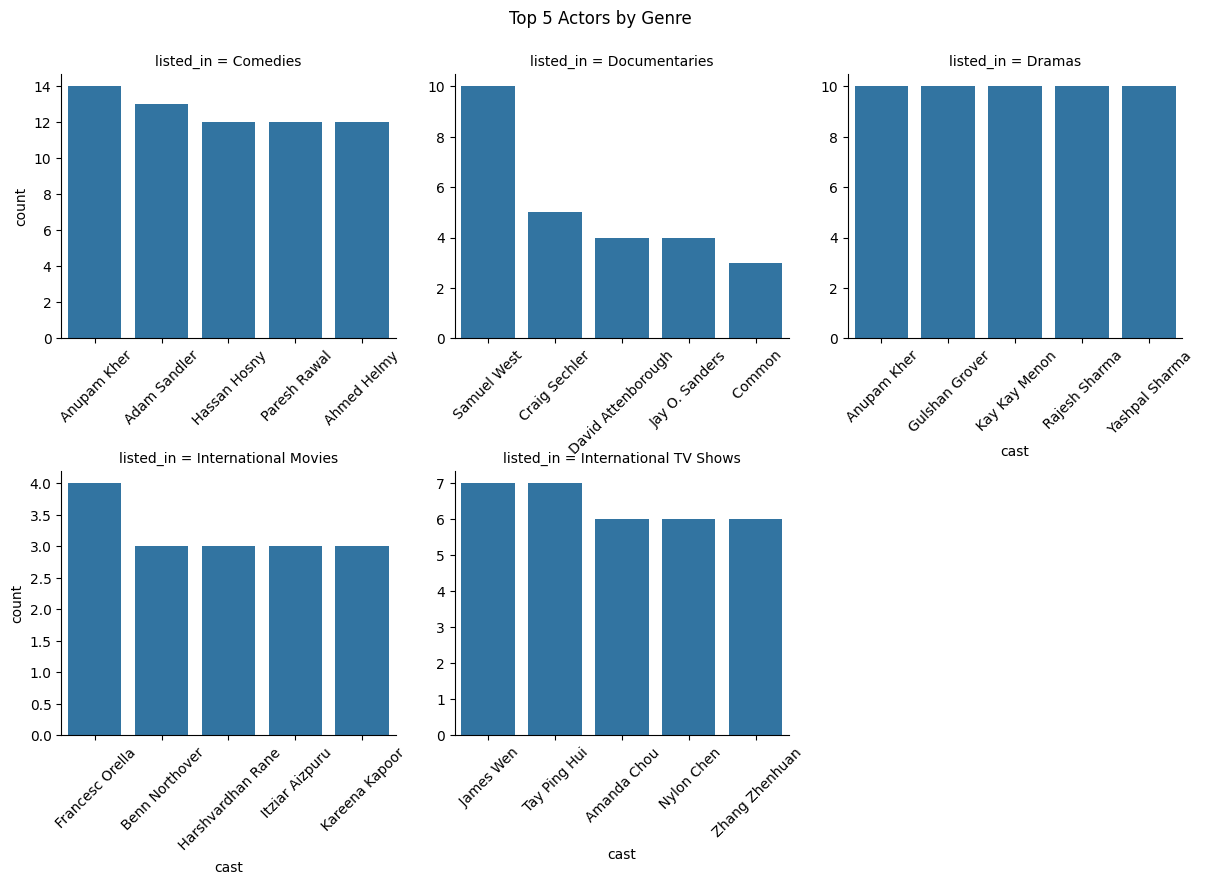

In [ ]:
plt.figure(figsize=(10,6))
g=sns.catplot(data=top_5_actor_by_genre_filtered, x='cast', y='count', col='listed_in', kind='bar', col_wrap=3, height=4, sharex=False, sharey=False)
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle("Top 5 Actors by Genre")
plt.show()

Grouping by genre and director

In [ ]:
dir_genre_exploded = dir_exploded.explode('listed_in')

In [ ]:
dir_genre_exploded.groupby(['director', 'listed_in'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,director,listed_in,count
9654,Rajiv Chilaka,Children & Family Movies,22
545,Jan Suter,Stand-Up Comedy,18
9781,Raúl Campos,Stand-Up Comedy,18
11305,Suhas Kadav,Children & Family Movies,16
7677,Marcus Raboy,Stand-Up Comedy,15
...,...,...,...
4386,Eshom Nelms,Thrillers,1
4388,Esteban Crespo,Romantic Movies,1
4389,Esteban Crespo,Action & Adventure,1
4390,Esteban Crespo,Dramas,1


In [ ]:
top_dir_by_genre = dir_genre_exploded.groupby(['listed_in', 'director'])['show_id'].count().reset_index(name='count')
top_dir_by_genre = top_dir_by_genre.loc[top_dir_by_genre.groupby('listed_in')['count'].idxmax()]
top_dir_by_genre.sort_values(by='count', ascending=False)

,listed_in,director,count
8001,Children & Family Movies,Rajiv Chilaka,22
12223,Stand-Up Comedy,Jan Suter,18
2896,International Movies,Cathy Garcia-Molina,11
7004,Action & Adventure,Don Michael Paul,9
500,Comedies,Suhas Kadav,8
...,...,...,...
12412,TV Action & Adventure,Jesse Warn,1
12414,TV Comedies,Gary Howsam,1
12421,TV Dramas,Daniel Minahan,1
12423,TV Horror,Eli Roth,1


Getting top five directors in top five genres.

In [ ]:
top_dir_by_genre = dir_genre_exploded.groupby(['listed_in', 'director'])['show_id'].count().reset_index(name='count')
top_5_dir_by_genre = top_dir_by_genre.groupby('listed_in').apply(lambda x: x.nlargest(5, 'count'))
top_5_dir_by_genre_filtered = top_5_dir_by_genre[top_5_dir_by_genre['listed_in'].isin(top_genres)]
top_5_dir_by_genre_filtered

/tmp/ipython-input-3177365154.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_dir_by_genre = top_dir_by_genre.groupby('listed_in').apply(lambda x: x.nlargest(5, 'count'))


listed_in  \
listed_in                                              
Comedies               8600                 Comedies   
                       8431                 Comedies   
                       8492                 Comedies   
                       8347                 Comedies   
                       8554                 Comedies   
Documentaries          10138           Documentaries   
                       9542            Documentaries   
                       9655            Documentaries   
                       9732            Documentaries   
                       9882            Documentaries   
Dramas                 10723                  Dramas   
                       10952                  Dramas   
                       10394                  Dramas   
                       10418                  Dramas   
                       10540                  Dramas   
International Movies   11950    International Movies   
                       12022    International Movies   
                       11938    International Movies   
                       11945    International Movies   
                       11965    International Movies   
International TV Shows 12082  International TV Shows   
                       12086  International TV Shows   
                       12113  International TV Shows   
                       12031  International TV Shows   
                       12032  International TV Shows   

                                              director  count  
listed_in                                                      
Comedies               8600                Hakan Algül      8  
                       8431        Cathy Garcia-Molina      7  
                       8492               David Dhawan      7  
                       8347               Anees Bazmee      5  
                       8554            Fernando Ayllón      5  
Documentaries          10138                Vlad Yudin      6  
                       9542               Barry Avrich      4  
                       9655           Edward Cotterill      4  
                       9732                 Hernán Zin      4  
                       9882                   Luis Ara      4  
Dramas                 10723          Hanung Bramantyo      8  
                       10952            Kunle Afolayan      6  
                       10394     Angga Dwimas Sasongko      5  
                       10418            Anurag Kashyap      5  
                       10540            Clint Eastwood      5  
International Movies   11950  Fernando González Molina      3  
                       12022          Theodore Boborol      3  
                       11938       Cathy Garcia-Molina      2  
                       11945         Daniel Calparsoro      2  
                       11965             Jeethu Joseph      2  
International TV Shows 12082               Hsu Fu-chun      2  
                       12086                Jung-ah Im      2  
                       12113               Shin Won-ho      2  
                       12031          Abhishek Chaubey      1  
                       12032          Aco Tenriyagelli      1

<Figure size 1000x600 with 0 Axes>

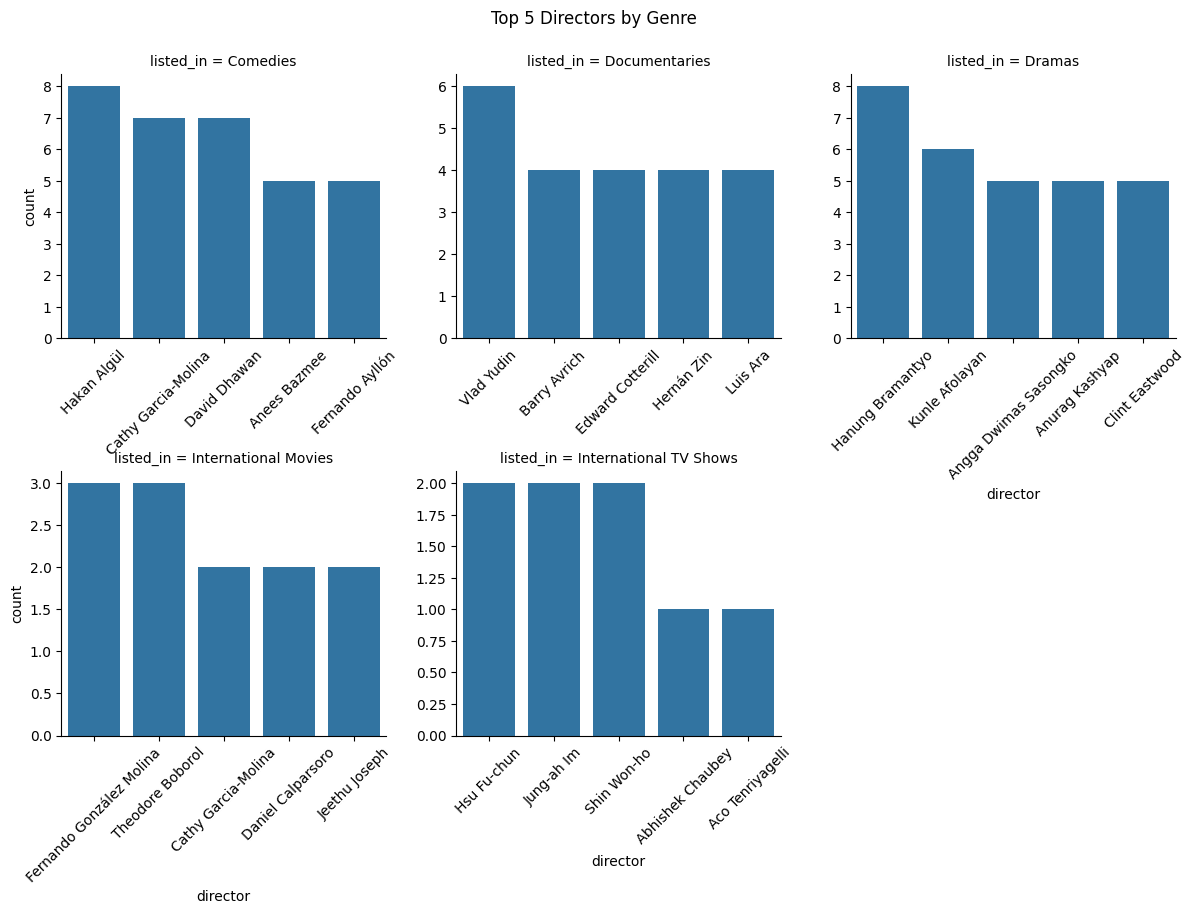

In [ ]:
plt.figure(figsize=(10,6))
g=sns.catplot(data=top_5_dir_by_genre_filtered, x='director', y='count', col='listed_in', kind='bar', col_wrap=3, height=4, sharex=False, sharey=False)
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(hspace=0.5)
plt.subplots_adjust(top=0.9)
plt.suptitle("Top 5 Directors by Genre")
plt.show()

Analysing cast and country

In [ ]:
cast_country_exploded = cast_exploded.explode('country')

In [ ]:
cast_country=cast_country_exploded.groupby(['cast', 'country'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
top_cast_country=cast_country.head(20)
top_cast_country

,cast,country,count
3834,Anupam Kher,India,36
44027,Takahiro Sakurai,Japan,28
55001,Shah Rukh Khan,India,25
34963,Paresh Rawal,India,24
34531,Om Puri,India,24
48298,Yuki Kaji,Japan,24
49107,Akshay Kumar,India,23
6023,Boman Irani,India,23
23633,Kareena Kapoor,India,20
32916,Naseeruddin Shah,India,20


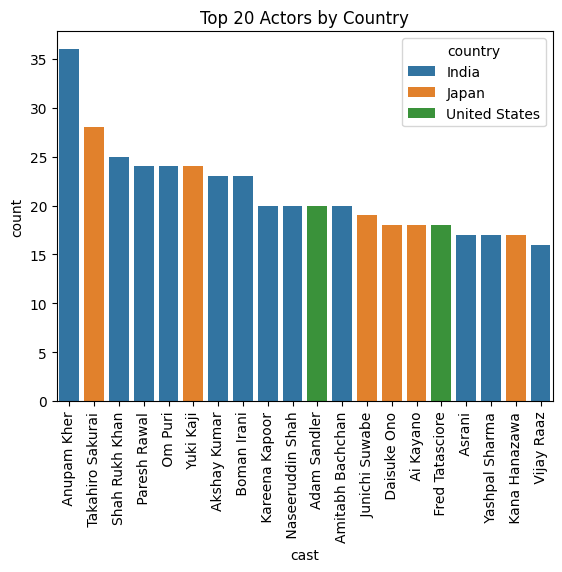

In [ ]:
sns.barplot(data=top_cast_country, x='cast', y='count', hue='country')
plt.xticks(rotation=90)
plt.title('Top 20 Actors by Country')
plt.show()



*   Anupham Kher and Takahiro have appeared in most content and belong to India and Japan respectively.
*   Most actors are from India.



Analysing directors and country

In [ ]:
dir_country_exploded = dir_exploded.explode('country')

In [ ]:
dir_country=dir_country_exploded.groupby(['director', 'country'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
top_dir_country=dir_country.head(20)
top_dir_country

,director,country,count
4345,Marcus Raboy,United States,15
3264,Jay Karas,United States,15
1823,Cathy Garcia-Molina,Philippines,13
3260,Jay Chapman,United States,12
6262,Steven Spielberg,United States,11
4466,Martin Scorsese,United States,10
358,Jan Suter,Mexico,9
6842,Youssef Chahine,Egypt,9
5491,Raúl Campos,Mexico,9
2184,David Dhawan,India,9


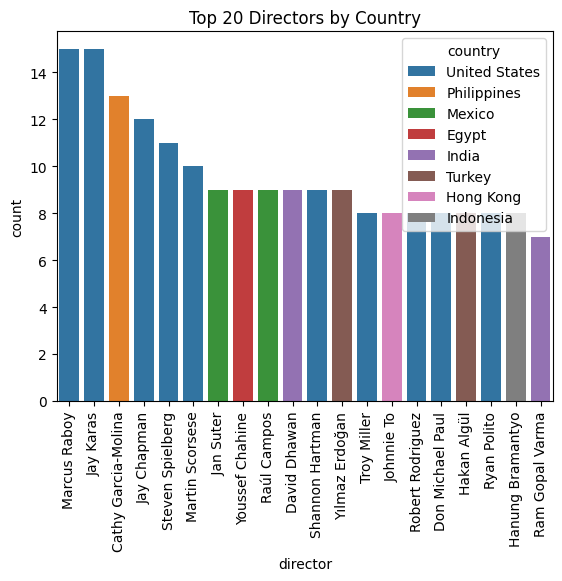

In [ ]:
sns.barplot(data=top_dir_country, x='director', y='count', hue='country')
plt.xticks(rotation=90)
plt.title('Top 20 Directors by Country')
plt.show()


*   Top directors are Macus Raboy and belong to United States.
*   Most top directors are from US.



### Recommendations



1.   Netflix has much more content of Movies than TV Shows. It can increase the number of TV Shows to cover wide variety of audience while adding more movies.
2.   Most of the movies are around 100 minutes so movies having 1.5 hrs to  2hrs duration are in sweet spot.
3. Mostly number of seasons for TV Shows are one means Netflix adds limited series more. It can keep adding more such limited series. These can have regional stories also which can be told to global audience.
4. Series which have continued for more seasons can be renewed if performing well.
5. Comparatively more movies and shows are added in holidays and festivals. Netflix can add more content in such times. Moreover regionally such occasions can be pointed out and content belonging specific to those regions can be added at that time.
6. International TV Shows and Movies are comparatively higher. Such movies and shows can be added in more local languages or with subtitles to diversify audiences. International collaborations can be done with such actors and directors which work for these.
7. In India movies are being added much higher compared to TV Shows. More TV Shows can be produced and added, initially starting with limited series to gain audience for this format also.
8. US is already having most number of movies and shows on Netflix. More content can be added from here.


### Conclusion



1.   Netflix has a large collection of Movies and TV Shows and shows a strong global growth trend. It can keep expanding its content to other countries by adding localized content with different genres at the same time continuing to add more content from present countries.
2.   Netflix can experiment on certain areas such as diversifying its ratings and bringing other kinds of content to strengthen its market share and retain more users.



In [ ]:
# 🔧 Install required tools
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic wkhtmltopdf
!pip install nbconvert


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
# ⚙️ Convert notebook to high-quality PDF
NOTEBOOK_NAME="netflix.ipynb"          # 👈 change this if your file has another name
HTML_NAME="netflix.html"
PDF_NAME="netflix_HQ.pdf"

# Convert notebook → HTML
!jupyter nbconvert --to html "/content/$NOTEBOOK_NAME" --output "/content/$HTML_NAME"

[NbConvertApp] Converting notebook /content/netflix.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 22 image(s).
[NbConvertApp] Writing 1871507 bytes to /content/netflix.html


In [ ]:
# Convert HTML → high-quality PDF
!wkhtmltopdf --zoom 2 --dpi 300 "/content/$HTML_NAME" "/content/$PDF_NAME"

# 📥 Download the resulting PDF
from google.colab import files
files.download("/content/" + PDF_NAME)

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>